In [1]:
from google.colab import files
data_to_load = files.upload()

Saving titanic.csv to titanic.csv


In [2]:
import pandas as pd
import plotly.express as px

df = pd.read_csv("titanic.csv")

print(df.head())

   PassengerId  Pclass  Sex   Age  SibSp  Parch  Survived
0            1       3    1  34.5      1      0         0
1            2       1    0  47.0      1      0         1
2            3       3    0  62.0      0      0         1
3            4       1    0  27.0      1      0         1
4            5       3    1  22.0      0      0         0


In [3]:
import pandas as pd

col_names = ['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Survived']

df = pd.read_csv("titanic.csv", names=col_names).iloc[1:]

print(df.head())

  PassengerId Pclass Sex   Age SibSp Parch Survived
1           1      3   1  34.5     1     0        0
2           2      1   0    47     1     0        1
3           3      3   0    62     0     0        1
4           4      1   0    27     1     0        1
5           5      3   1    22     0     0        0


In [4]:
features = ['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Survived']
X = df[features]
Y = df.Survived

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1)

clf = DecisionTreeClassifier()

clf = clf.fit(X_train, Y_train)

Y_pred = clf.predict(X_test)

print("Accuracy", metrics.accuracy_score(Y_test, Y_pred))

Accuracy 1.0


In [6]:
from sklearn.tree import export_graphviz
from io import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()

export_graphviz(clf, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names=features, class_names=['0','1'])

print(dot_data.getvalue())

digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname="helvetica"] ;
edge [fontname="helvetica"] ;
0 [label=<Survived &le; 0.5<br/>gini = 0.463<br/>samples = 623<br/>value = [396, 227]<br/>class = 0>, fillcolor="#f4c9aa"] ;
1 [label=<gini = 0.0<br/>samples = 396<br/>value = [396, 0]<br/>class = 0>, fillcolor="#e58139"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label=<gini = 0.0<br/>samples = 227<br/>value = [0, 227]<br/>class = 1>, fillcolor="#399de5"] ;
0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
}


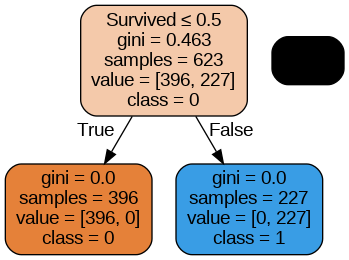

In [8]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('titanic.png')
Image(graph.create_png())

In [9]:
clf = DecisionTreeClassifier(max_depth=3)

clf = clf.fit(X_train,Y_train)

Y_pred = clf.predict(X_test)
print("Accuracy", metrics.accuracy_score(Y_test, Y_pred))

Accuracy 1.0


digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname="helvetica"] ;
edge [fontname="helvetica"] ;
0 [label=<Survived &le; 0.5<br/>gini = 0.463<br/>samples = 623<br/>value = [396, 227]<br/>class = 0>, fillcolor="#f4c9aa"] ;
1 [label=<gini = 0.0<br/>samples = 396<br/>value = [396, 0]<br/>class = 0>, fillcolor="#e58139"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label=<gini = 0.0<br/>samples = 227<br/>value = [0, 227]<br/>class = 1>, fillcolor="#399de5"] ;
0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
}


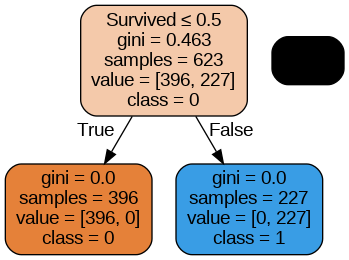

In [10]:
dot_data = StringIO()

export_graphviz(clf, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names=features, class_names=['0','1'])

print(dot_data.getvalue())

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('titanic.png')
Image(graph.create_png())